In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy import stats
from IPython.display import display


## Paper count by year
Total Papers and Papers with Figures

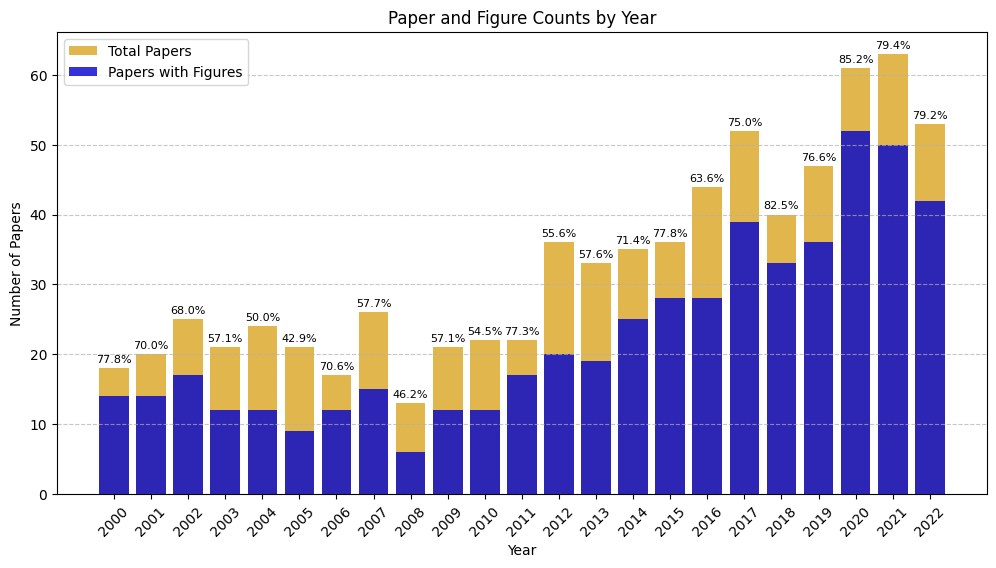

In [2]:
base_directory = '../papers_by_year'
excel_directory = '../cropped_and_labeled_image_data'

def count_papers_and_figures(base_directory, excel_directory):
    paper_counts = {}
    paper_with_figures_counts = {}
    
    for year in range(2000, 2023):  # From 2000 to 2022
        year_str = str(year)
        year_dir = os.path.join(base_directory, year_str)
        excel_path = os.path.join(excel_directory, f"{year}_cropped_and_labeled_figs.xlsx")
        
        # Count total papers, excluding non-paper files like .DS_Store
        if os.path.exists(year_dir):
            total_count = len([name for name in os.listdir(year_dir) if os.path.isfile(os.path.join(year_dir, name)) and name != '.DS_Store'])
        else:
            total_count = 0
        
        # Count papers with figures, assuming 'original paper' is the correct column name
        if os.path.exists(excel_path):
            df = pd.read_excel(excel_path)
            papers_with_figures = len(df['original paper'].unique())
        else:
            papers_with_figures = 0
        
        paper_counts[year_str] = total_count
        paper_with_figures_counts[year_str] = papers_with_figures
    
    return paper_counts, paper_with_figures_counts


def plot_paper_counts(paper_counts, paper_with_figures_counts):
    years = list(paper_counts.keys())
    total_counts = list(paper_counts.values())
    figures_counts = list(paper_with_figures_counts.values())
    
    # Creating the bar plot
    plt.figure(figsize=(12, 6))
    # Plot total papers bar
    plt.bar(years, total_counts, color='goldenrod', label='Total Papers', alpha=0.8)
    # Overlay papers with figures bar
    plt.bar(years, figures_counts, color='mediumblue', label='Papers with Figures', alpha=0.8)
    
    # Add titles, labels, and grid
    plt.title('Paper and Figure Counts by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Papers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    
    # Calculate and annotate each bar with the percentage
    for i, (total, figures) in enumerate(zip(total_counts, figures_counts)):
        if total > 0:  # Prevent division by zero
            percentage = (figures / total) * 100
            # Annotate on top of the total bar
            plt.text(years[i], total + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=8)


    plt.legend()
    
    # Display the plot
    plt.show()

# Retrieve data
paper_counts, paper_with_figures_counts = count_papers_and_figures(base_directory, excel_directory)

# Plot the data
plot_paper_counts(paper_counts, paper_with_figures_counts)



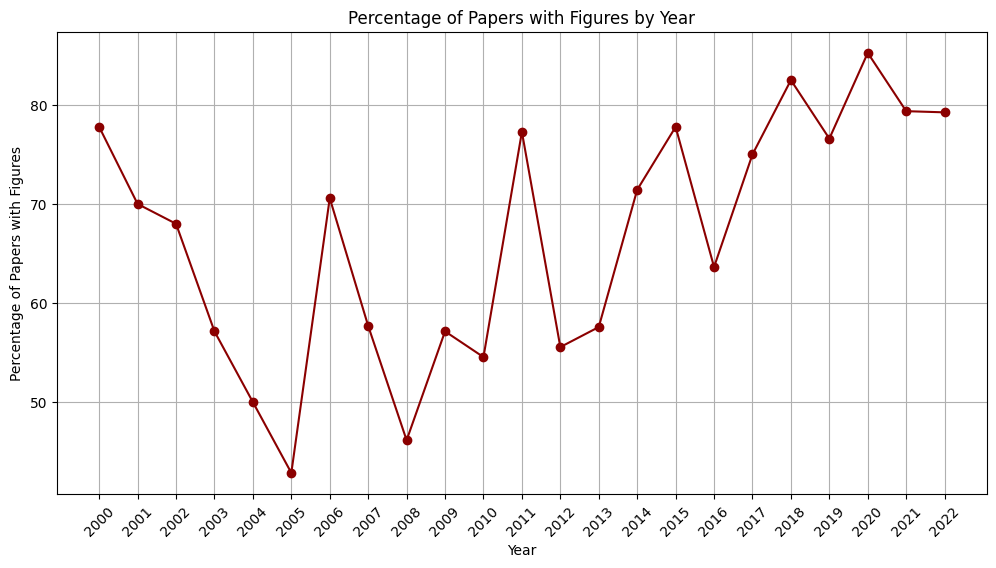

In [3]:
def plot_percentage_of_papers_with_figures(paper_counts, paper_with_figures_counts):
    years = list(paper_counts.keys())
    total_counts = list(paper_counts.values())
    figures_counts = list(paper_with_figures_counts.values())
    
    # Calculate percentages
    percentages = [(figures / total * 100) if total > 0 else 0 for total, figures in zip(total_counts, figures_counts)]

    # Creating the line plot
    plt.figure(figsize=(12, 6))
    plt.plot(years, percentages, marker='o', linestyle='-', color='darkred')
    
    # Add titles and labels
    plt.title('Percentage of Papers with Figures by Year')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Papers with Figures')
    
    # Grid and x-tick rotation for better readability
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()

plot_percentage_of_papers_with_figures(paper_counts, paper_with_figures_counts)

## Average Figures per Paper
For all papers and papers with figures

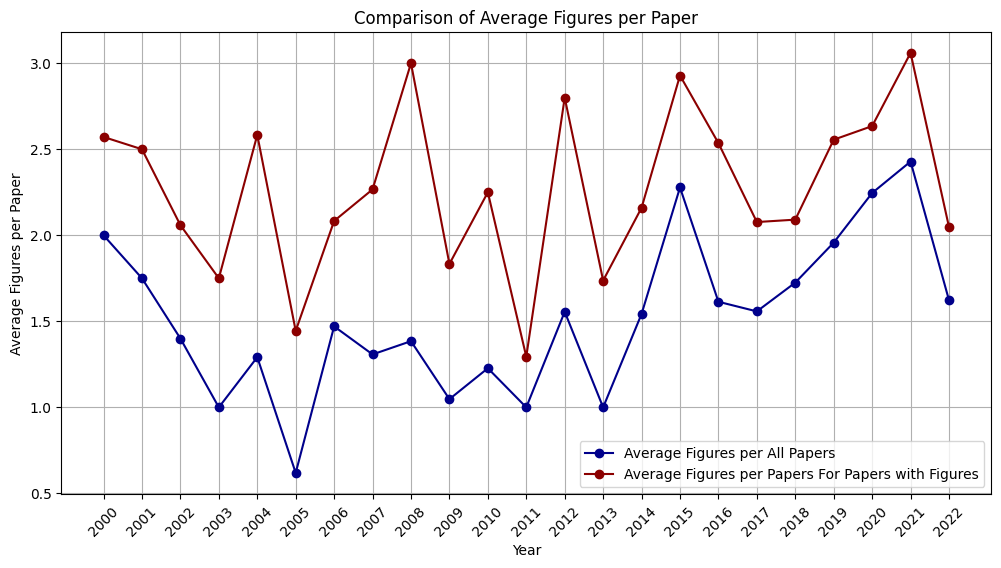

In [4]:
def count_papers_and_figures(base_directory, excel_directory):
    paper_counts = {}
    figures_per_paper_in_excel = {}
    total_figures_counts = {}

    for year in range(2000, 2023):  # From 2000 to 2022
        year_str = str(year)
        year_dir = os.path.join(base_directory, year_str)
        excel_path = os.path.join(excel_directory, f"{year}_cropped_and_labeled_figs.xlsx")

        # Count total papers
        if os.path.exists(year_dir):
            total_count = len([name for name in os.listdir(year_dir) if os.path.isfile(os.path.join(year_dir, name)) and name != '.DS_Store'])
        else:
            total_count = 0

        # Count total figures and papers with figures from Excel
        if os.path.exists(excel_path):
            df = pd.read_excel(excel_path)
            figures_per_paper = df['original paper'].value_counts()
            total_figures_from_excel = figures_per_paper.sum()
            average_figures_per_paper_in_excel = figures_per_paper.mean() if not figures_per_paper.empty else 0
        else:
            total_figures_from_excel = 0
            average_figures_per_paper_in_excel = 0

        paper_counts[year_str] = total_count
        total_figures_counts[year_str] = total_figures_from_excel
        figures_per_paper_in_excel[year_str] = average_figures_per_paper_in_excel

    return paper_counts, total_figures_counts, figures_per_paper_in_excel

def plot_comparison_of_average_figures(paper_counts, total_figures_counts, figures_per_paper_in_excel):
    years = list(paper_counts.keys())
    total_papers = list(paper_counts.values())
    total_figures = list(total_figures_counts.values())
    avg_figures_per_paper_in_excel = list(figures_per_paper_in_excel.values())

    # Calculate the average number of figures per paper across all papers
    avg_figures_per_paper = [(figures / papers) if papers > 0 else 0 for papers, figures in zip(total_papers, total_figures)]

    plt.figure(figsize=(12, 6))
    plt.plot(years, avg_figures_per_paper, marker='o', linestyle='-', color='darkblue', label='Average Figures per All Papers')
    plt.plot(years, avg_figures_per_paper_in_excel, marker='o', linestyle='-', color='darkred', label='Average Figures per Papers For Papers with Figures')

    plt.title('Comparison of Average Figures per Paper')
    plt.xlabel('Year')
    plt.ylabel('Average Figures per Paper')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()

    plt.show()


# Retrieve data
paper_counts, total_figures_counts, figures_per_paper_in_excel = count_papers_and_figures(base_directory, excel_directory)

# Plot the data
plot_comparison_of_average_figures(paper_counts, total_figures_counts, figures_per_paper_in_excel)


## Figure types by year 
For papers that have figures
For categories and subcategories

/var/folders/5b/4s4ttql508dccc90bhk9j9g80000gn/T/ipykernel_55922/3521197892.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(subcategories))


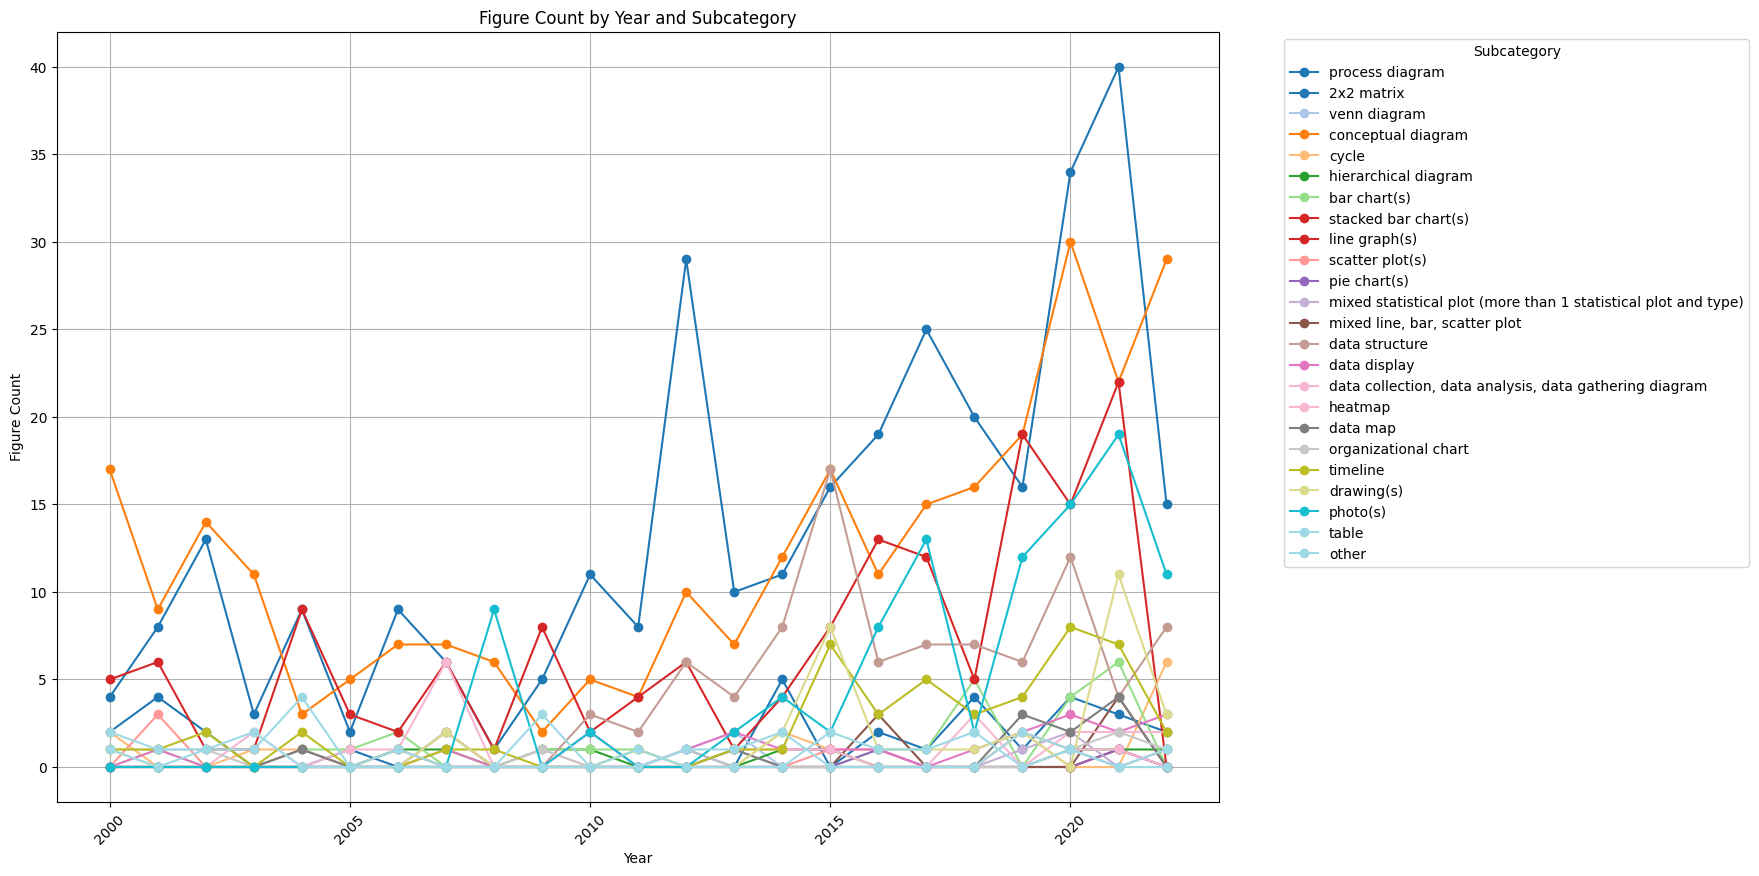

In [5]:
def count_figures_by_subcategory_and_year(base_directory, excel_directory, subcategories):
    # Initialize dictionary to hold data
    figures_by_year_and_subcategory = {year: {subcategory: 0 for subcategory in subcategories} for year in range(2000, 2023)}
    
    for year in range(2000, 2023):
        year_str = str(year)
        excel_path = os.path.join(excel_directory, f"{year}_cropped_and_labeled_figs.xlsx")

        # Process Excel files if they exist
        if os.path.exists(excel_path):
            df = pd.read_excel(excel_path)

            # Count figures by subcategory
            for subcategory in subcategories:
                count = df[df['subcategory'] == subcategory].shape[0]
                figures_by_year_and_subcategory[year][subcategory] += count

    return figures_by_year_and_subcategory

def plot_figures_by_subcategory(figures_by_year_and_subcategory, subcategories):
    plt.figure(figsize=(15, 10))
    
    # Generate a color map to cycle through
    color_map = plt.cm.get_cmap('tab20', len(subcategories))
    
    # Plot data for each subcategory
    for idx, subcategory in enumerate(subcategories):
        years = list(figures_by_year_and_subcategory.keys())
        counts = [figures_by_year_and_subcategory[year][subcategory] for year in years]
        
        plt.plot(years, counts, label=subcategory, color=color_map(idx), marker='o', linestyle='-')

    plt.title('Figure Count by Year and Subcategory')
    plt.xlabel('Year')
    plt.ylabel('Figure Count')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Define base directories
base_directory = '../papers_by_year'
excel_directory = '../cropped_and_labeled_image_data'

# Define subcategories list
subcategories = [
    "process diagram", "2x2 matrix", "venn diagram", "conceptual diagram", "cycle", "hierarchical diagram",
    "bar chart(s)", "stacked bar chart(s)", "line graph(s)", "scatter plot(s)", "pie chart(s)", 
    "mixed statistical plot (more than 1 statistical plot and type)", "mixed line, bar, scatter plot",
    "data structure", "data display", "data collection, data analysis, data gathering diagram",
    "heatmap", "data map", "organizational chart", "timeline", "drawing(s)", "photo(s)", "table", "other"
]

# Retrieve data
figures_by_year_and_subcategory = count_figures_by_subcategory_and_year(base_directory, excel_directory, subcategories)

# Plot the data
plot_figures_by_subcategory(figures_by_year_and_subcategory, subcategories)


/var/folders/5b/4s4ttql508dccc90bhk9j9g80000gn/T/ipykernel_55922/1079141832.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(subcategories))


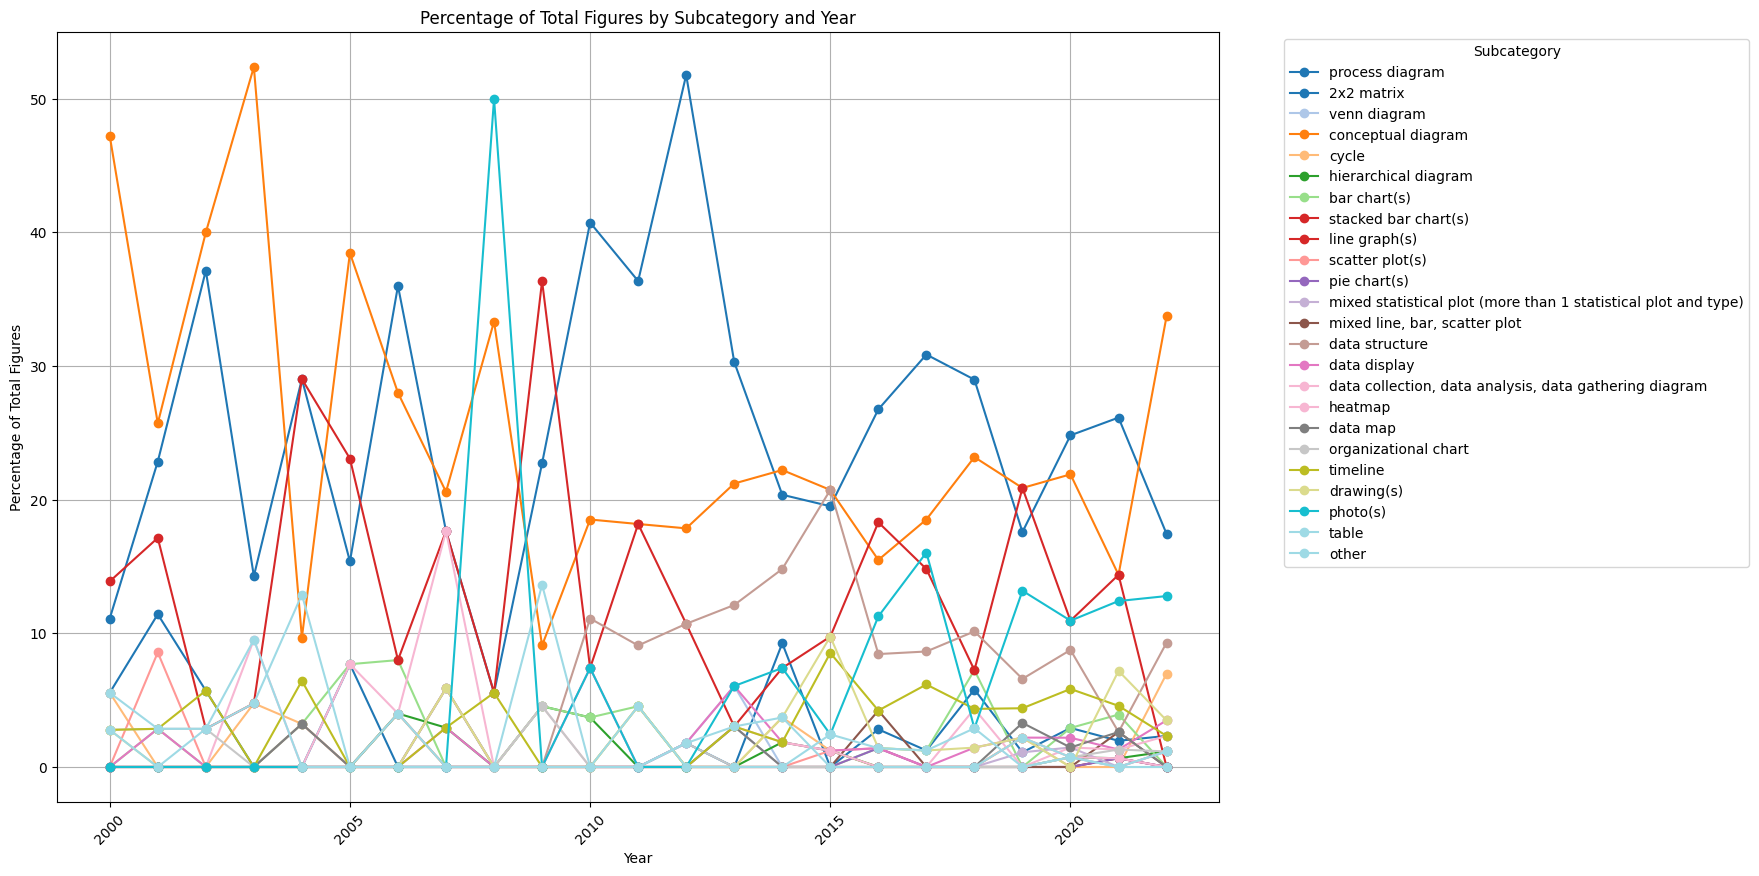

In [6]:
def count_figures_by_subcategory_and_year_for_percent(base_directory, excel_directory, subcategories):
    # Initialize dictionaries to hold data
    figures_by_year_and_subcategory = {year: {subcategory: 0 for subcategory in subcategories} for year in range(2000, 2023)}
    total_figures_by_year = {year: 0 for year in range(2000, 2023)}

    for year in range(2000, 2023):
        year_str = str(year)
        excel_path = os.path.join(excel_directory, f"{year}_cropped_and_labeled_figs.xlsx")

        # Process Excel files if they exist
        if os.path.exists(excel_path):
            df = pd.read_excel(excel_path)
            
            # Count figures by subcategory
            for subcategory in subcategories:
                count = df[df['subcategory'] == subcategory].shape[0]
                figures_by_year_and_subcategory[year][subcategory] += count
                total_figures_by_year[year] += count  # Total count for all subcategories

    return figures_by_year_and_subcategory, total_figures_by_year

def plot_percent_figures_by_subcategory(figures_by_year_and_subcategory, total_figures_by_year, subcategories):
    plt.figure(figsize=(15, 10))
    
    # Generate a color map to cycle through
    color_map = plt.cm.get_cmap('tab20', len(subcategories))
    
    # Plot data for each subcategory
    for idx, subcategory in enumerate(subcategories):
        years = list(figures_by_year_and_subcategory.keys())
        percentages = [
            (figures_by_year_and_subcategory[year][subcategory] / total_figures_by_year[year] * 100) if total_figures_by_year[year] > 0 else 0
            for year in years
        ]
        
        plt.plot(years, percentages, label=subcategory, color=color_map(idx), marker='o', linestyle='-')

    plt.title('Percentage of Total Figures by Subcategory and Year')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Total Figures')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Retrieve data
figures_by_year_and_subcategory, total_figures_by_year = count_figures_by_subcategory_and_year_for_percent(base_directory, excel_directory, subcategories)

# Plot the data
plot_percent_figures_by_subcategory(figures_by_year_and_subcategory, total_figures_by_year, subcategories)

/var/folders/5b/4s4ttql508dccc90bhk9j9g80000gn/T/ipykernel_55922/2402337712.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(categories))


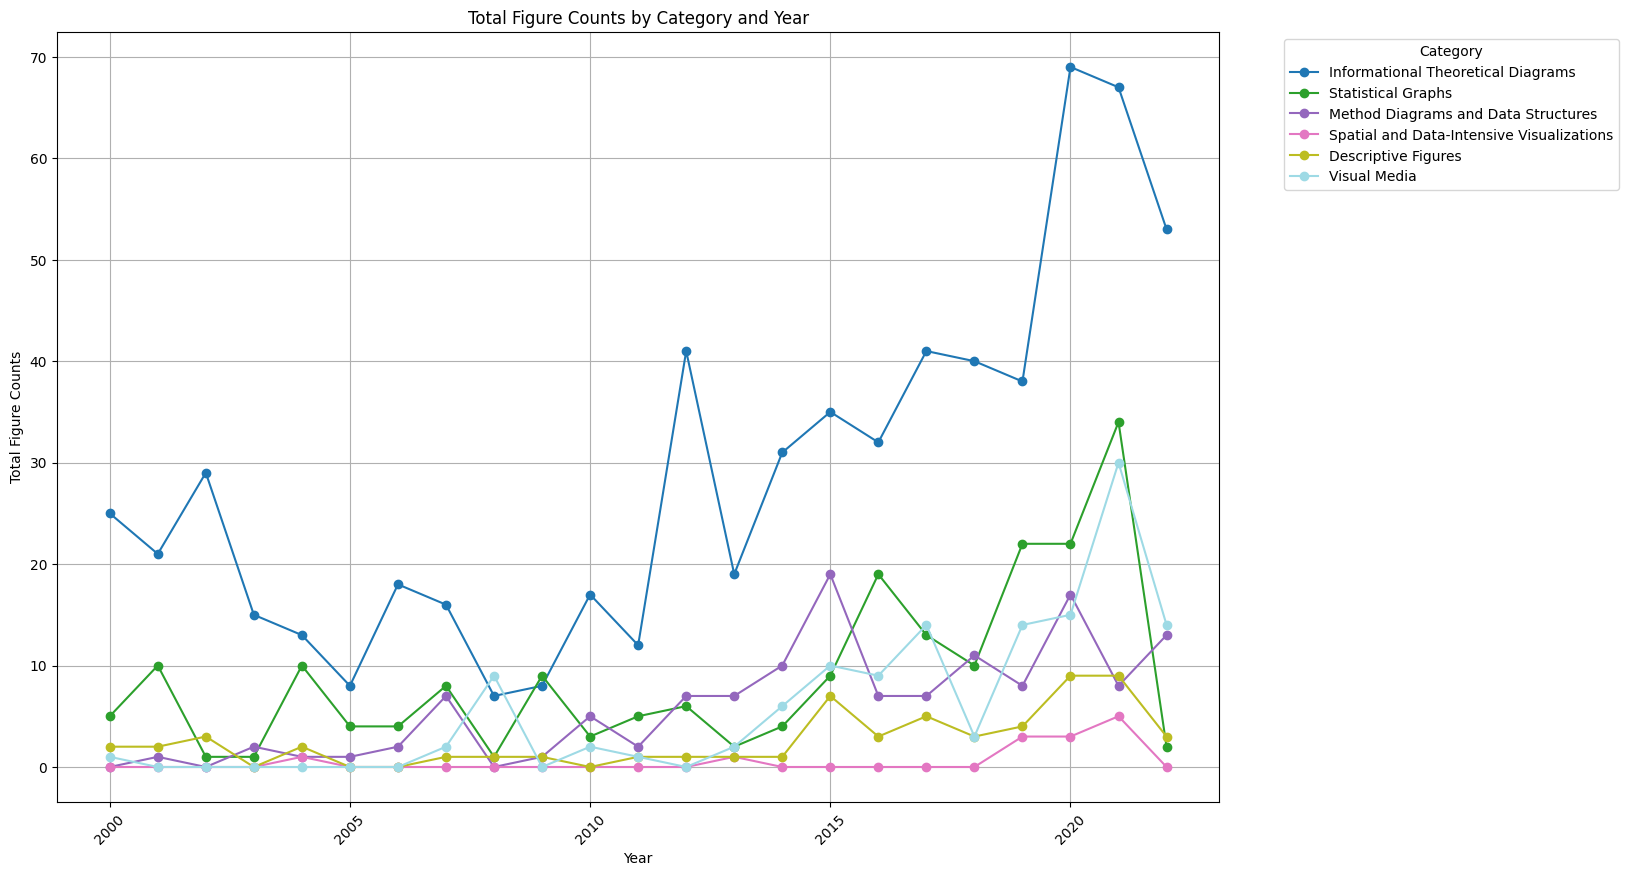

In [7]:
categories = {
    "Informational Theoretical Diagrams" : [
        "process diagram", "2x2 matrix", "venn diagram", "conceptual diagram", "cycle", "hierarchical diagram"
    ],
    "Statistical Graphs" : [
        "bar chart(s)", "stacked bar chart(s)", "line graph(s)", "scatter plot(s)", "pie chart(s)", 
        "mixed statistical plot (more than 1 statistical plot and type)", "mixed line, bar, scatter plot"
    ],
    "Method Diagrams and Data Structures"  : ["data structure", "data display", "data collection, data analysis, data gathering diagram"],
    "Spatial and Data-Intensive Visualizations" : ["heatmap", "data map"],
    "Descriptive Figures" : ["organizational chart", "timeline"],
    "Visual Media": ["drawing(s)", "photo(s)"]
}
def count_figures_by_category_and_year(base_directory, excel_directory, categories):
    # Reverse map from subcategory to category
    subcategory_to_category = {subcat: cat for cat, subcats in categories.items() for subcat in subcats}
    
    # Initialize dictionaries to hold data
    figures_by_year_and_category = {year: {category: 0 for category in categories} for year in range(2000, 2023)}
    total_figures_by_year = {year: 0 for year in range(2000, 2023)}

    for year in range(2000, 2023):
        year_str = str(year)
        excel_path = os.path.join(excel_directory, f"{year}_cropped_and_labeled_figs.xlsx")

        if os.path.exists(excel_path):
            df = pd.read_excel(excel_path)
            # Filter out entries whose subcategories are not in any category
            df = df[df['subcategory'].isin(subcategory_to_category)]
            
            for subcategory, count in df['subcategory'].value_counts().items():
                category = subcategory_to_category[subcategory]
                figures_by_year_and_category[year][category] += count
                total_figures_by_year[year] += count

    return figures_by_year_and_category, total_figures_by_year

def plot_total_counts_by_category(figures_by_year_and_category, categories):
    plt.figure(figsize=(15, 10))
    color_map = plt.cm.get_cmap('tab20', len(categories))
    
    years = list(figures_by_year_and_category.keys())
    
    for idx, (category, color) in enumerate(zip(categories, color_map.colors)):
        counts = [figures_by_year_and_category[year][category] for year in years]
        plt.plot(years, counts, label=category, color=color, marker='o', linestyle='-')

    plt.title('Total Figure Counts by Category and Year')
    plt.xlabel('Year')
    plt.ylabel('Total Figure Counts')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Retrieve data
figures_by_year_and_category, total_figures_by_year = count_figures_by_category_and_year(base_directory, excel_directory, categories)

# Plot total counts
plot_total_counts_by_category(figures_by_year_and_category, categories)

/var/folders/5b/4s4ttql508dccc90bhk9j9g80000gn/T/ipykernel_55922/714680523.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(categories))


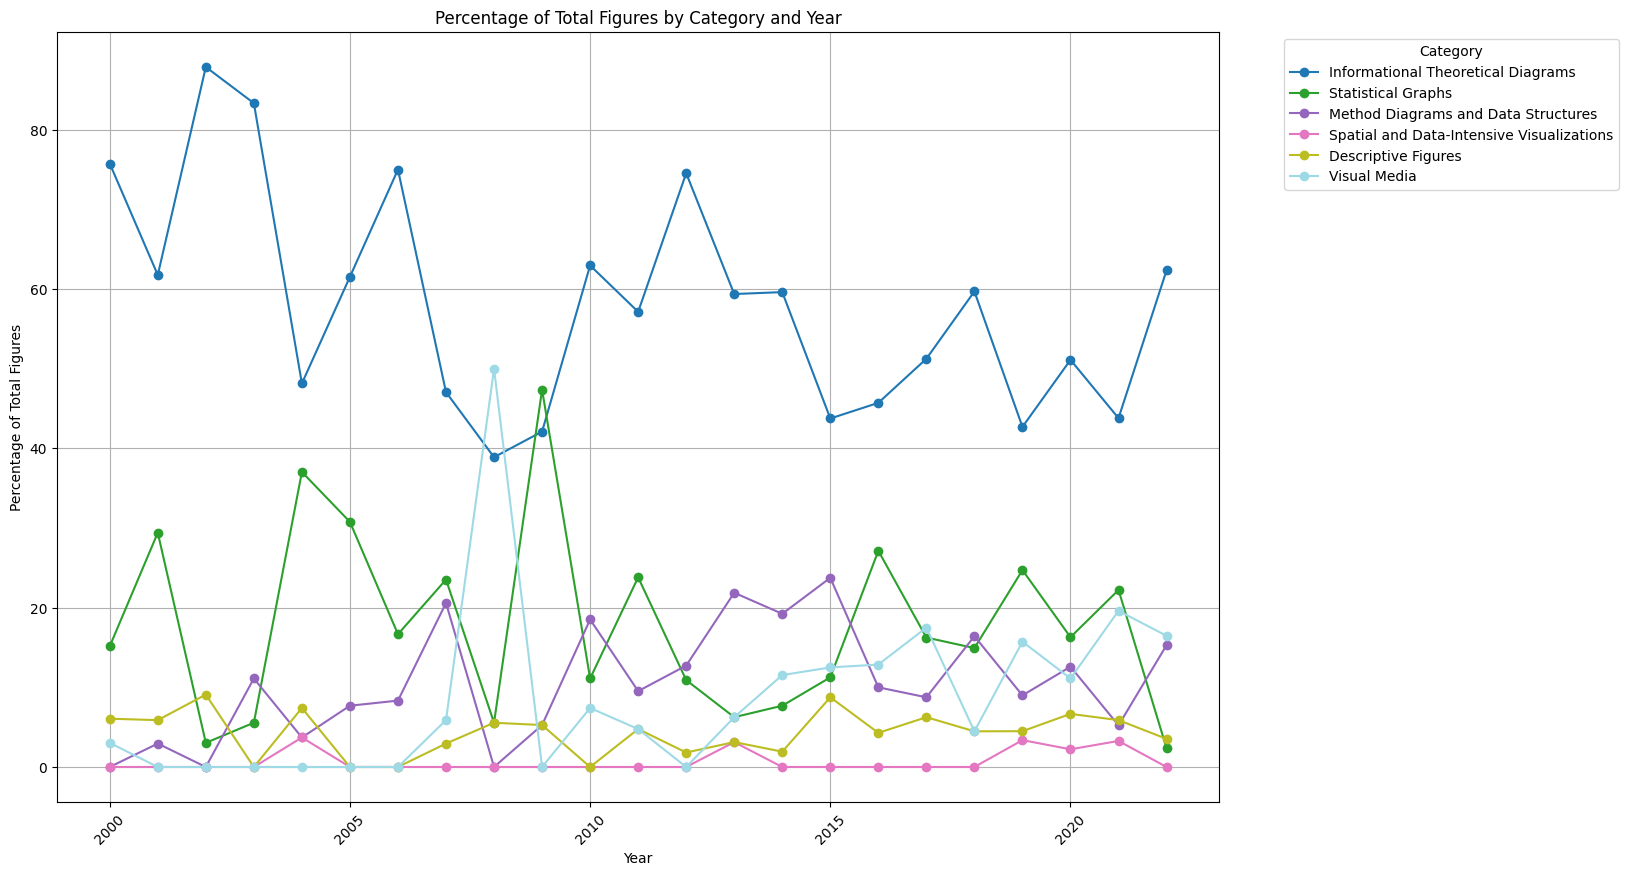

In [8]:
def plot_percent_figures_by_category(figures_by_year_and_category, total_figures_by_year, categories):
    plt.figure(figsize=(15, 10))
    color_map = plt.cm.get_cmap('tab20', len(categories))
    
    years = list(figures_by_year_and_category.keys())
    
    for idx, (category, color) in enumerate(zip(categories, color_map.colors)):
        percentages = [
            (figures_by_year_and_category[year][category] / total_figures_by_year[year] * 100) if total_figures_by_year[year] > 0 else 0
            for year in years
        ]
        plt.plot(years, percentages, label=category, color=color, marker='o', linestyle='-')

    plt.title('Percentage of Total Figures by Category and Year')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Total Figures')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_percent_figures_by_category(figures_by_year_and_category, total_figures_by_year, categories)


## Diagram data counts by year for Informational Theoretical Diagrams - excluding 2x2 matrix and venn diagram categories


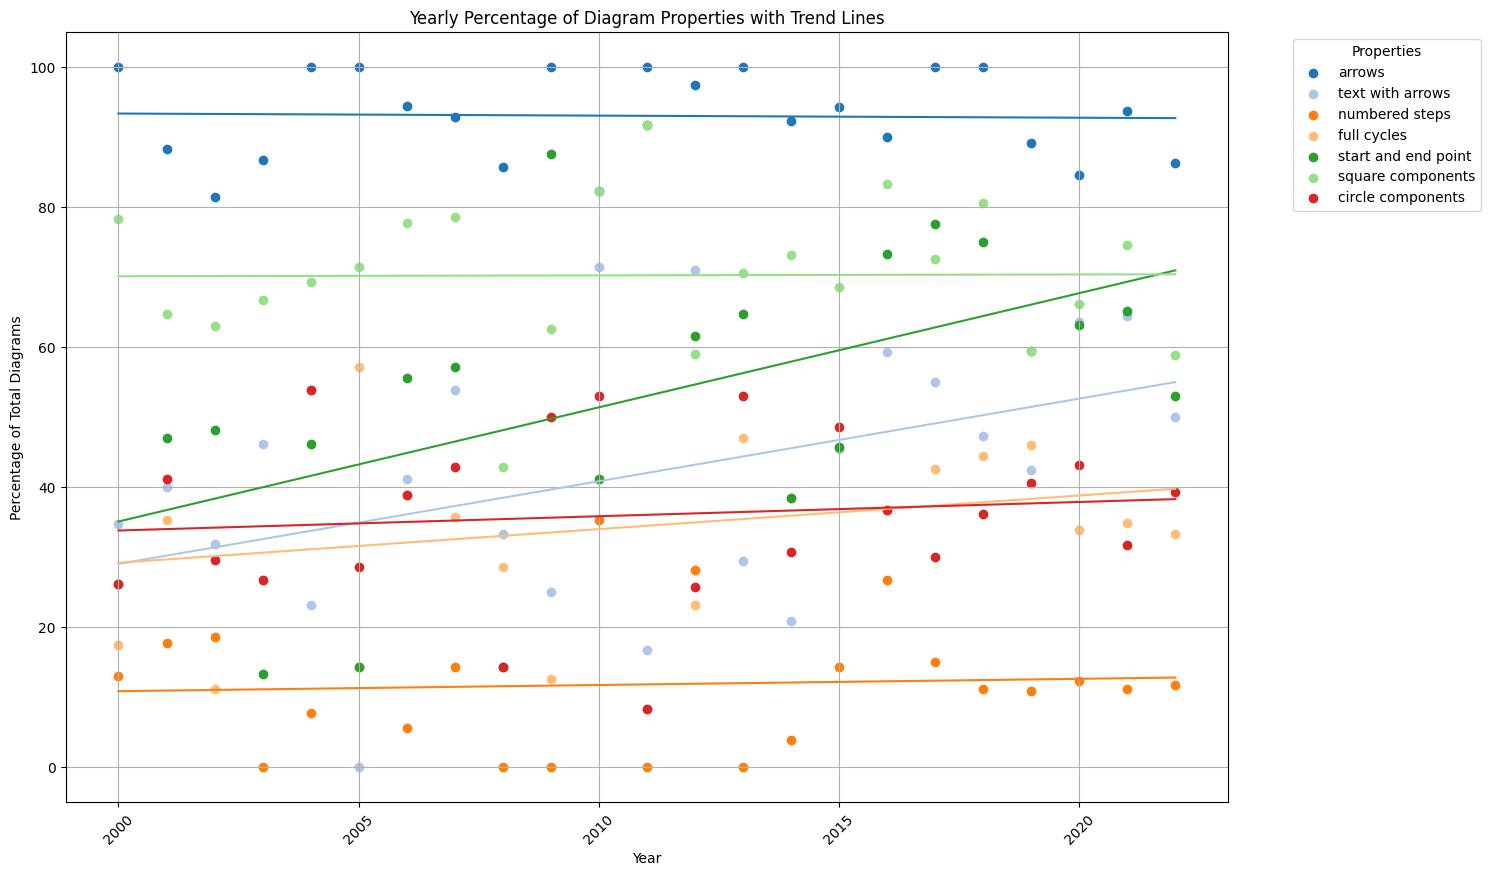

,Property,Slope,R-squared,p-value,Std Err
0,arrows,-0.029728,0.000975,0.887529,0.207658
1,text with arrows,1.180631,0.193154,0.035876,0.526559
2,numbered steps,0.088326,0.004009,0.774102,0.303796
3,full cycles,0.480618,0.061711,0.253056,0.408956
4,start and end point,1.631081,0.256142,0.013738,0.606555
5,square components,0.013004,0.000071,0.969549,0.336600
6,circle components,0.203887,0.013496,0.597588,0.380383


In [15]:
informational_theoretical_subcategories = ["process diagram", "conceptual diagram", "cycle", "hierarchical diagram"]
def aggregate_diagram_data(base_directory, diagram_data_directory, informational_theoretical_subcategories, years_range, properties):
    
    data_by_year_and_property = {year: {prop: 0 for prop in properties} for year in years_range}
    total_diagrams_by_year = {year: 0 for year in years_range}
    total_arrows_by_year = {year: 0 for year in years_range}

    for year in years_range:
        excel_path = os.path.join(base_directory, f"{year}_cropped_and_labeled_figs.xlsx")
        diagram_data_path = os.path.join(diagram_data_directory, f"{year}_diagram_data.xlsx")
        
        if os.path.exists(excel_path) and os.path.exists(diagram_data_path):
            figs_df = pd.read_excel(excel_path)
            diagram_df = pd.read_excel(diagram_data_path)
            
            # Filter for subcategories to check
            figs_df = figs_df[figs_df['subcategory'].isin(informational_theoretical_subcategories)]
            
            # Merge data on image path
            merged_df = pd.merge(figs_df, diagram_df, left_on='new image path', right_on='image path')
            
            # Count "Yes" responses for each property
            for prop in properties:
                if prop == 'text with arrows':
                    # Calculate "text with arrows" based on arrows being "Yes"
                    subset_df = merged_df[merged_df['arrows'] == 'Yes']
                    data_by_year_and_property[year][prop] += (subset_df[prop] == 'Yes').sum()
                    total_arrows_by_year[year] += len(subset_df)
                else:
                    data_by_year_and_property[year][prop] += (merged_df[prop] == 'Yes').sum()

            # Count total diagrams (excluding "Non applicable")
            total_diagrams_by_year[year] += len(merged_df[(merged_df[properties] != "Non applicable").all(axis=1)])

    # Convert counts to percentages
    percent_data_by_year_and_property = {
        year: {
            prop: (
                (count / total_arrows_by_year[year] * 100) if prop == 'text with arrows' and total_arrows_by_year[year] > 0 else
                (count / total_diagrams_by_year[year] * 100 if total_diagrams_by_year[year] > 0 else 0)
            ) for prop, count in props.items()
        } for year, props in data_by_year_and_property.items()
    }

    return percent_data_by_year_and_property

diagram_data_directory = "../diagram_data"
years_range = range(2000,2023)


def plot_diagram_data(percent_data_by_year_and_property):
    plt.figure(figsize=(15, 10))
    years = list(percent_data_by_year_and_property.keys())
    year_indexes = np.array([int(year) for year in years])  # Convert years to numpy array for trendline calculation
    
    # Updated way to get a color map
    color_map = mpl.colormaps['tab20']

    significance_data = []

    for idx, prop in enumerate(percent_data_by_year_and_property[years[0]]):
        percentages = np.array([percent_data_by_year_and_property[year][prop] for year in years])
        
        # Create scatter plot
        scatter = plt.scatter(years, percentages, label=prop, color=color_map(idx % 20))  # mod 20 because 'tab20' has 20 colors
        
        # Calculate the trend line using linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(year_indexes, percentages)
        p = np.poly1d([slope, intercept])
        
        # Plot the trend line
        plt.plot(years, p(year_indexes), linestyle='-', color=scatter.get_edgecolor())  # Use edge color of scatter
        
        # Collect significance values
        significance_data.append({
            'Property': prop,
            'Slope': slope,
            'R-squared': r_value**2,
            'p-value': p_value,
            'Std Err': std_err
        })

    plt.title('Yearly Percentage of Diagram Properties with Trend Lines')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Total Diagrams')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='Properties', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Create DataFrame from significance data and display as a table
    significance_df = pd.DataFrame(significance_data)
    display(significance_df)


# Plot the percentage data
properties = ['arrows', 'text with arrows', 'numbered steps', 'full cycles', 'start and end point', 'square components', 'circle components']
informational_theoretical_subcategories = ["process diagram", "conceptual diagram", "cycle", "hierarchical diagram"]
percent_data_by_year_and_property = aggregate_diagram_data(excel_directory, diagram_data_directory, informational_theoretical_subcategories, years_range, properties)
plot_diagram_data(percent_data_by_year_and_property)

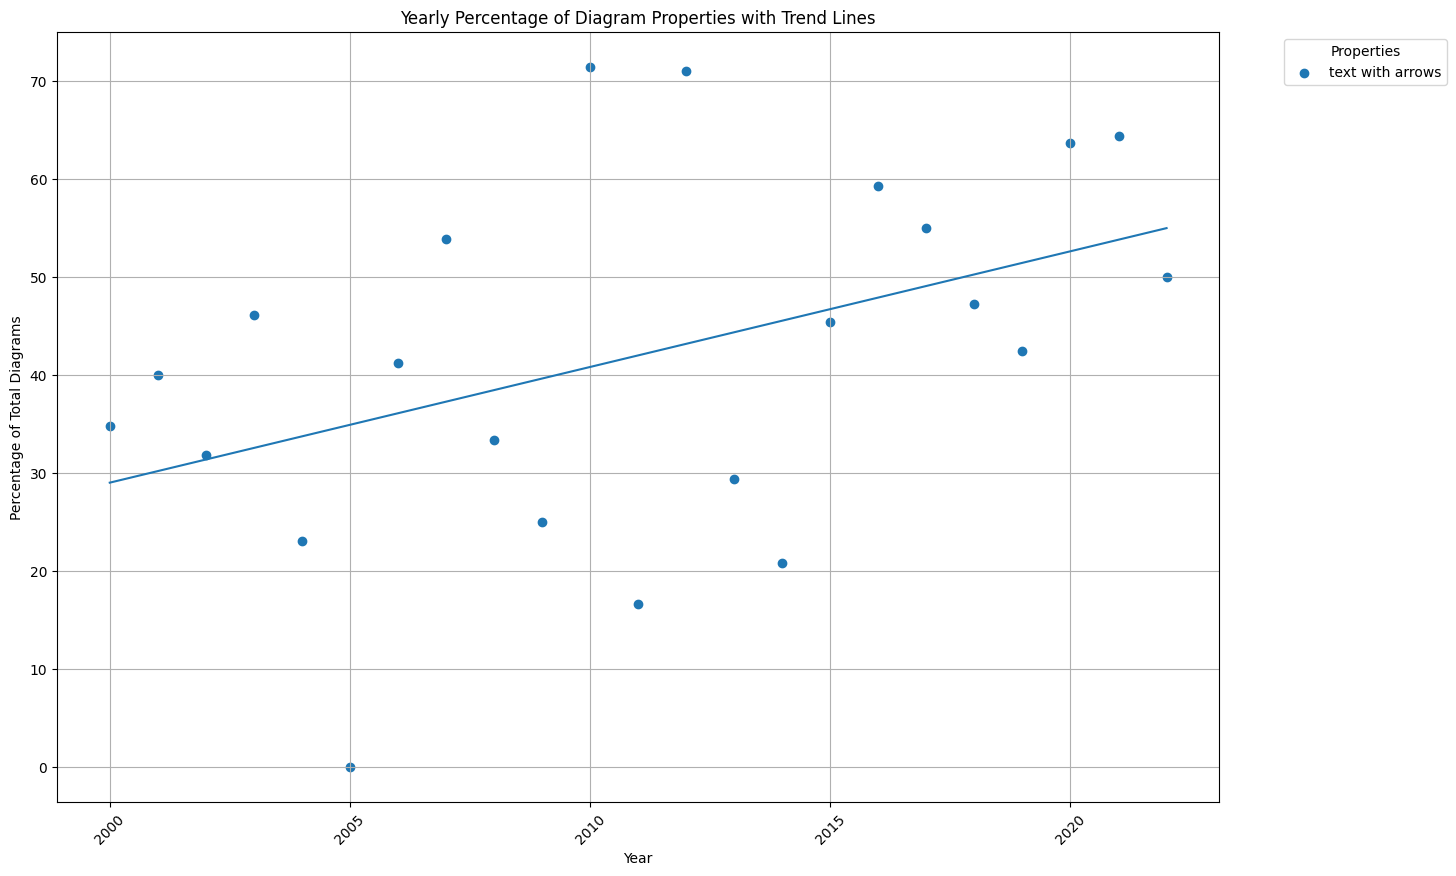

,Property,Slope,R-squared,p-value,Std Err
0,text with arrows,1.180631,0.193154,0.035876,0.526559


In [14]:
# Plot the percentage data
arrow_properties = ['text with arrows']
informational_theoretical_subcategories = ["process diagram", "conceptual diagram", "cycle", "hierarchical diagram"]
percent_data_by_year_and_property = aggregate_diagram_data(excel_directory, diagram_data_directory, informational_theoretical_subcategories, years_range, arrow_properties)
plot_diagram_data(percent_data_by_year_and_property)

## Process diagram only 

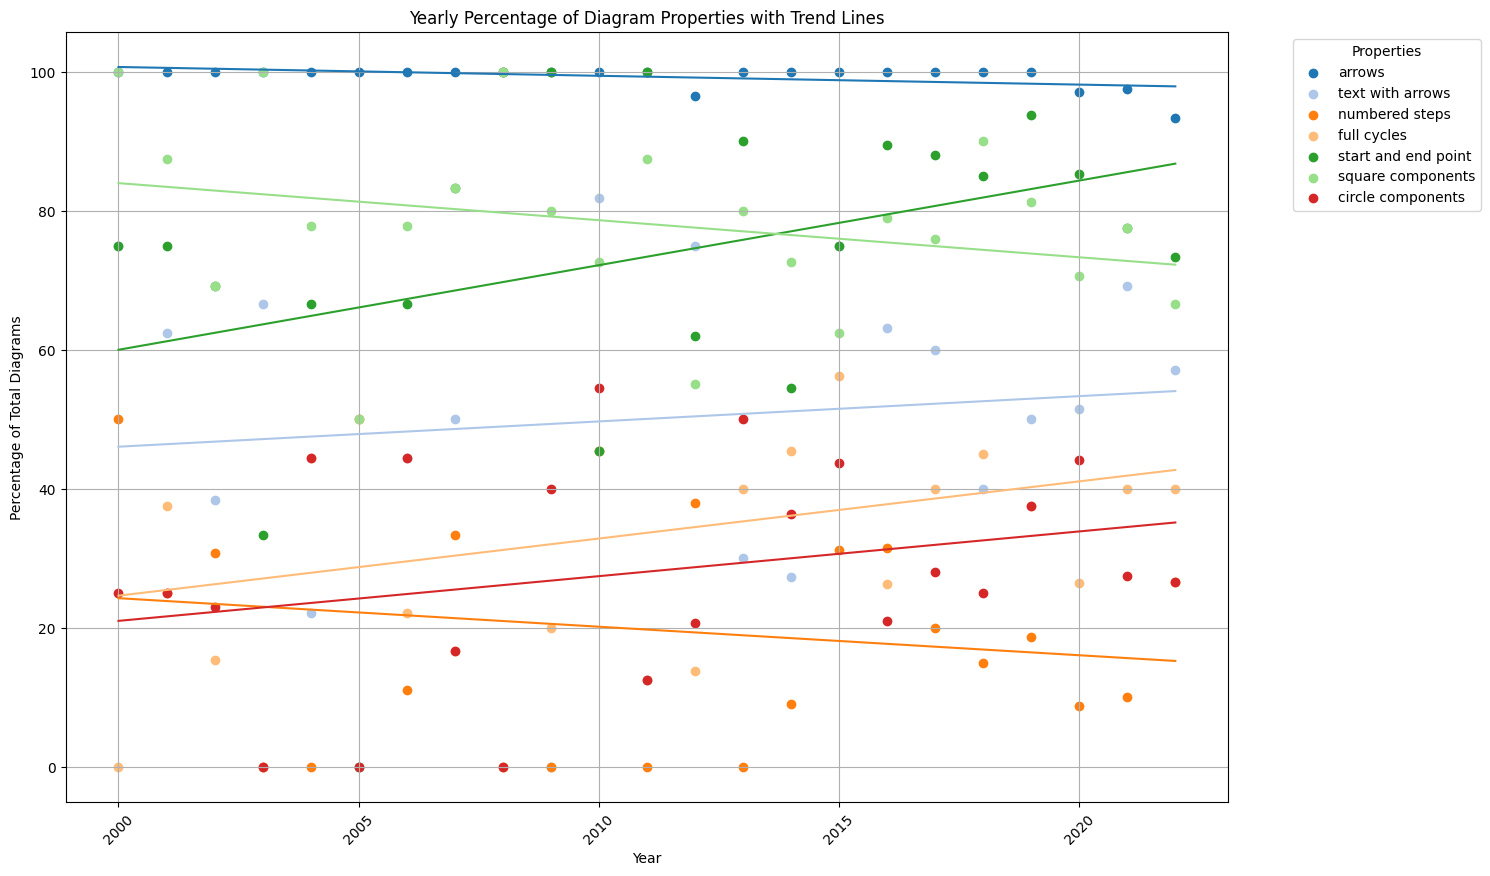

,Property,Slope,R-squared,p-value,Std Err
0,arrows,-0.126731,0.267707,0.011456,0.045739
1,text with arrows,0.363676,0.008998,0.666821,0.832874
2,numbered steps,-0.410497,0.027322,0.451021,0.534481
3,full cycles,0.822298,0.068116,0.229034,0.663706
4,start and end point,1.217249,0.124450,0.098723,0.704553
5,square components,-0.533352,0.078025,0.196776,0.400079
6,circle components,0.643476,0.077355,0.198791,0.484949


In [16]:
informational_theoretical_subcategories = ["process diagram"]
percent_data_by_year_and_property = aggregate_diagram_data(excel_directory, diagram_data_directory, informational_theoretical_subcategories, years_range, properties)
plot_diagram_data(percent_data_by_year_and_property)

## Conceptual Diagrams Only 

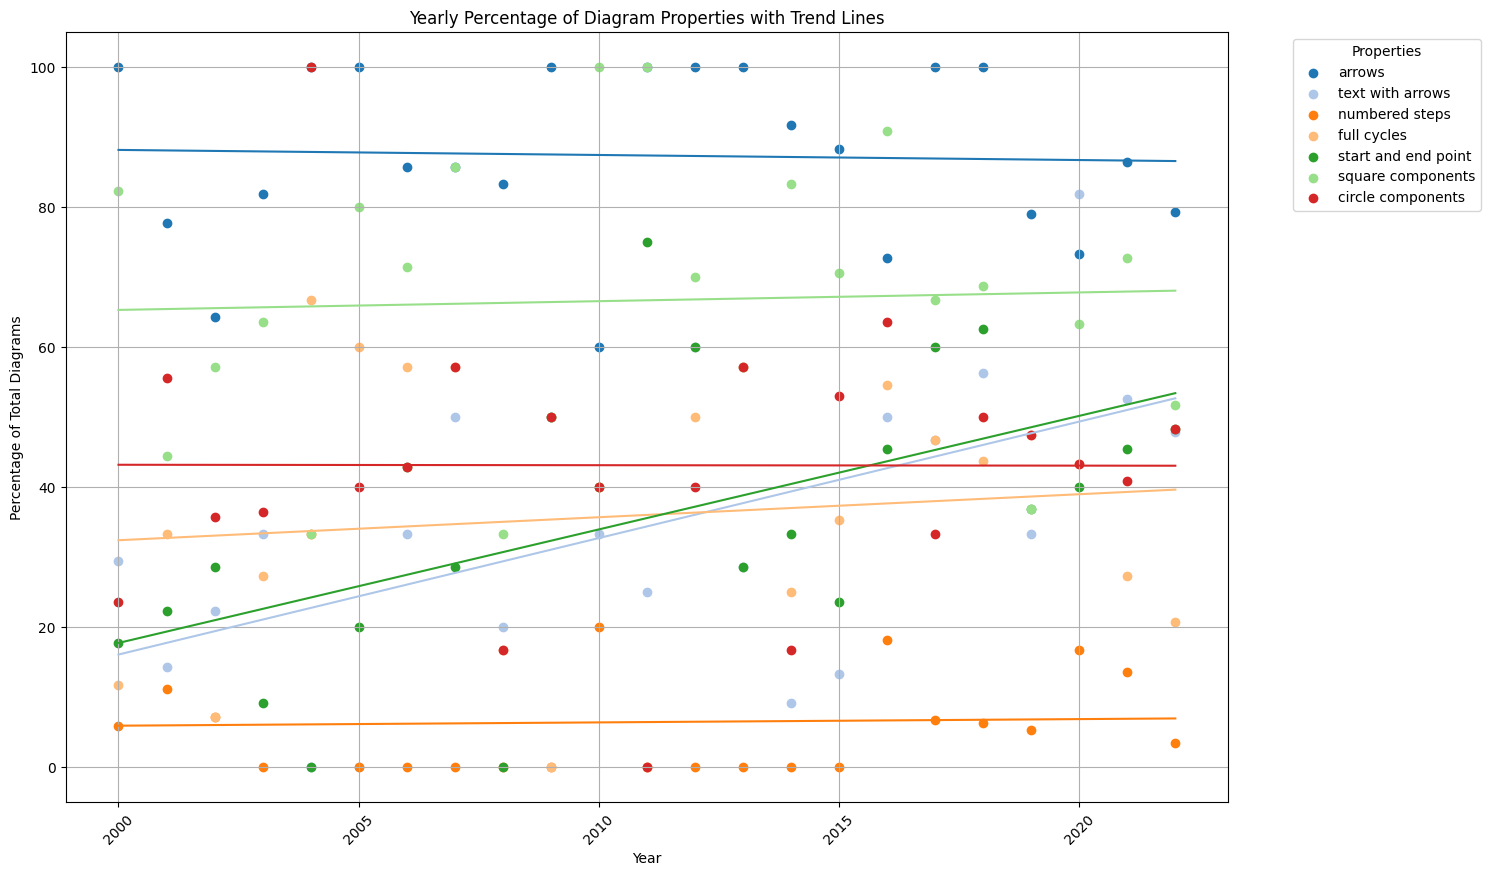

,Property,Slope,R-squared,p-value,Std Err
0,arrows,-0.072250,0.001540,0.858890,0.401422
1,text with arrows,1.663912,0.306628,0.006120,0.546006
2,numbered steps,0.047058,0.001326,0.869002,0.281860
3,full cycles,0.328592,0.012601,0.610091,0.634737
4,start and end point,1.622103,0.316887,0.005165,0.519712
5,square components,0.124874,0.001908,0.843146,0.623324
6,circle components,-0.006195,0.000005,0.992191,0.625432


In [17]:
informational_theoretical_subcategories = ["conceptual diagram"]
percent_data_by_year_and_property = aggregate_diagram_data(excel_directory, diagram_data_directory, informational_theoretical_subcategories, years_range, properties)
plot_diagram_data(percent_data_by_year_and_property)